In [2]:
#Test commit
#Adding commit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler, SMOTE, KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans


# Data Ingestion, Summary and Investigation

In [3]:
df = pd.read_csv('googleplaystore.csv')

In [4]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.shape

(10841, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
for column in df.columns:
    print(column.upper())
    print(df[column].unique())
    print('')
    print(df[column].value_counts())
    print('')

APP
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

CATEGORY
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'CO

# Data Cleaning and Imputation

In [10]:
def produce_missing_report(df):
    percent_missing= df.isnull().sum() *100 /len(df)
    missing_values_df=pd.DataFrame(
        {
        'column_name':df.columns,
        'percent_missing': percent_missing
        }
    )
    return missing_values_df

In [11]:
produce_missing_report(df)

,column_name,percent_missing
App,App,0.000000
Category,Category,0.000000
Rating,Rating,13.596532
Reviews,Reviews,0.000000
Size,Size,0.000000
Installs,Installs,0.000000
Type,Type,0.009224
Price,Price,0.000000
Content Rating,Content Rating,0.009224
Genres,Genres,0.000000


In [12]:
df[df['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no rows with a rating less than one. Ratings must be between 1 and 5

In [13]:
invalid_rating= df[df['Rating']>5]
invalid_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


There is one row with a rating more than 5 so we drop it.

In [14]:
df=df.drop(invalid_rating.index)

In [15]:
missing_ratings=df[df['Rating'].isnull()]
missing_ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [16]:
#df['Rating'].fillna(0.0)
#df.info()

In [17]:
missing_ratings=df['Rating'].isnull()
none_missing= ~missing_ratings
df=df[none_missing]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [18]:
produce_missing_report(df)

,column_name,percent_missing
App,App,0.000000
Category,Category,0.000000
Rating,Rating,0.000000
Reviews,Reviews,0.000000
Size,Size,0.000000
Installs,Installs,0.000000
Type,Type,0.000000
Price,Price,0.000000
Content Rating,Content Rating,0.000000
Genres,Genres,0.000000


The rows containing missing values for Type and Content Rating were also dropped

In [19]:
df['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

Varies with device is the mode value. We will replace missing values with it.

In [20]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [21]:
df['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [22]:
df['Current Ver'] = df['Current Ver'].fillna('Varies with device')
df['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [23]:
produce_missing_report(df)

,column_name,percent_missing
App,App,0.000000
Category,Category,0.000000
Rating,Rating,0.000000
Reviews,Reviews,0.000000
Size,Size,0.000000
Installs,Installs,0.000000
Type,Type,0.000000
Price,Price,0.000000
Content Rating,Content Rating,0.000000
Genres,Genres,0.000000


In [24]:
df['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [25]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Both rows containing missing values were last updated in 2018. We will replace the adroid ver with the modal adroid ver in 2018

In [26]:
df2018=df[df['Last Updated'].str.contains('2018')]
df2018['Android Ver'].mode()    #modal Adroid Ver of apps from 2018

0    4.1 and up
Name: Android Ver, dtype: object

In [27]:
df['Android Ver'] = df['Android Ver'].fillna('4.1 and up')
df['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [28]:
produce_missing_report(df)

,column_name,percent_missing
App,App,0.0
Category,Category,0.0
Rating,Rating,0.0
Reviews,Reviews,0.0
Size,Size,0.0
Installs,Installs,0.0
Type,Type,0.0
Price,Price,0.0
Content Rating,Content Rating,0.0
Genres,Genres,0.0


In [29]:
df.drop_duplicates(keep = 'first', ignore_index = True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [30]:
df[['Size', 'Price', 'Installs']] = df[['Size', 'Price', 'Installs']].astype(str)
df['Reviews']= df['Reviews'].astype('int64')


In [31]:
def clean_size(x):
    if x=="Varies with device":
        x='0.0'
    if 'k' in x:
        if x=="8.5k":
            return "0.0085" #hard coding because i am fed up
        l=slice(-1)
        x=x[l]  #remove k
        n= len(x)
        a="0."
        if n==3:
            x=a+x
        elif n<3:
            for i in range (n):
                a=a+"0"
            x=a+x
        else:   #n>3
            f=slice(1)
            first= x[f]
            l=slice(1, n+1)
            last=x[l]
            x= first + "." + last
    if 'M' in x:
        l=slice(-1) #remove M
        x=x[l]
    return x
    

In [32]:
#clean_size= df['Size']
#clean_size= clean_size.replace('Varies with device', '0.0')
#clean_size= clean_size.str.removesuffix('M')
#clean_size=clean_size.str.removesuffix('k')
df['Size']=df['Size'].apply(clean_size)
df['Size']=df['Size'].astype('float64')

In [33]:
clean_price= df['Price']
clean_price= clean_price.replace(0, 0.0)
clean_price=clean_price.str.removeprefix('$')
clean_price.value_counts()
df['Price']=clean_price
df['Price']=df['Price'].astype('float64')

In [34]:
def clean_strings(string, st_letter, ls_letter, caracter_br, caracter_af):
    string = string[st_letter: -ls_letter]
    string = string.replace(caracter_br, caracter_af)
    string = int(string)
    return string

In [35]:
clean_installs=df['Installs']
clean_installs= clean_installs.apply(lambda x: clean_strings(x, 0, 1, ',', ''))
clean_installs.value_counts()


1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [36]:
clean_installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [37]:
def normalize_the_installs(value):
    if value < 10**4:   # first quartile
        return '0+' 
    elif 10**4 <= value < 10**5:    # second quartile
        return '10,000+'
    elif 10**5 <= value < 10**6:    # third quartile
        return '100,000+'
    elif 10**6 <= value <10**8:    # fourth quartile
        return '1,000,000+'
    elif 10**8 <= value <10**9:    # fourth quartile
        return '100,000,000'
    else:   #if >10**9  , outliers
        return '1,000,000,000+'

In [38]:
df['Installs']=clean_installs
df['Installs'] = df['Installs'].apply(lambda x: normalize_the_installs(x))
df['Installs']

0           10,000+
1          100,000+
2        1,000,000+
3        1,000,000+
4          100,000+
            ...    
10834            0+
10836            0+
10837            0+
10839            0+
10840    1,000,000+
Name: Installs, Length: 9366, dtype: object

In [39]:
df['Installs'].value_counts()

1,000,000+        3870
0+                1792
100,000+          1688
10,000+           1477
100,000,000        481
1,000,000,000+      58
Name: Installs, dtype: int64

In [40]:
def get_year(lupdate):
    if lupdate.find(',') != -1 :  #only perform operation on Titles that contain a year
        components= lupdate.split(',')    
        Year = components[-1].strip()  #get year and one bracket
        #Year= Year[:-1] #remove 2nd bracket
        Year= int(Year)
        return Year

In [41]:
df['Last Updated']=df['Last Updated'].apply(get_year)
df['Last Updated']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10834    2017
10836    2017
10837    2018
10839    2015
10840    2018
Name: Last Updated, Length: 9366, dtype: int64

In [42]:
df['Type'].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

In [43]:
def clean_type(x):
    if x=='Free':
        return 1
    else:
        return 0

In [44]:
df['Type']=df['Type'].apply(clean_type)
df['Type']

0        1
1        1
2        1
3        1
4        1
        ..
10834    1
10836    1
10837    1
10839    1
10840    1
Name: Type, Length: 9366, dtype: int64

In [45]:
df['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [46]:
df['Content Rating']=df['Content Rating'].replace('Unrated', 'Everyone') #replace with mode

In [47]:
df['Content Rating'].value_counts()

Everyone           7421
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Name: Content Rating, dtype: int64

In [48]:
newClass1 = pd.Categorical(df['Content Rating'], ordered=True)
newClass1 = newClass1.rename_categories(['1.0', '2.0','3.0','4.0','5.0'])
newClass1.describe() 

,counts,freqs
categories,,
1.0,3,0.000320
2.0,7421,0.792334
3.0,397,0.042387
4.0,461,0.049221
5.0,1084,0.115738


In [49]:
df['Content Rating'] = newClass1

In [50]:
df['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
PERSONALIZATION         314
LIFESTYLE               314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [51]:
newClass2 = pd.Categorical(df['Category'], ordered=True)
newClass2 = newClass2.rename_categories(['1.0', '2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0', '12.0','13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0','21.0','22.0','23.0','24.0','25.0', '26.0','27.0','28.0','29.0','30.0','31.0','32.0','33.0'])
newClass2.describe()    

,counts,freqs
categories,,
1.0,62,0.006620
2.0,73,0.007794
3.0,42,0.004484
4.0,178,0.019005
5.0,303,0.032351
6.0,58,0.006193
7.0,328,0.035020
8.0,195,0.020820
9.0,155,0.016549


In [52]:
df['Category'] = newClass2

In [53]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,1.0,4.1,159,19.0,"10,000+",1,0.0,2.0,Art & Design,2018,1.0.0,4.0.3 and up
1,Coloring book moana,1.0,3.9,967,14.0,"100,000+",1,0.0,2.0,Art & Design;Pretend Play,2018,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.0,4.7,87510,8.7,"1,000,000+",1,0.0,2.0,Art & Design,2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,1.0,4.5,215644,25.0,"1,000,000+",1,0.0,5.0,Art & Design,2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,1.0,4.3,967,2.8,"100,000+",1,0.0,2.0,Art & Design;Creativity,2018,1.1,4.4 and up


In [54]:
new_df= df['Genres'].str.get_dummies(';') 
new_df

,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
new_df.columns

Index(['Action', 'Action & Adventure', 'Adventure', 'Arcade', 'Art & Design',
       'Auto & Vehicles', 'Beauty', 'Board', 'Books & Reference',
       'Brain Games', 'Business', 'Card', 'Casino', 'Casual', 'Comics',
       'Communication', 'Creativity', 'Dating', 'Education', 'Educational',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Maps & Navigation', 'Medical', 'Music', 'Music & Audio',
       'Music & Video', 'News & Magazines', 'Parenting', 'Personalization',
       'Photography', 'Pretend Play', 'Productivity', 'Puzzle', 'Racing',
       'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports',
       'Strategy', 'Tools', 'Travel & Local', 'Trivia',
       'Video Players & Editors', 'Weather', 'Word'],
      dtype='object')

In [56]:
merged_df= df.join(new_df)
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,1.0,4.1,159,19.0,"10,000+",1,0.0,2.0,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,1.0,3.9,967,14.0,"100,000+",1,0.0,2.0,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.0,4.7,87510,8.7,"1,000,000+",1,0.0,2.0,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,1.0,4.5,215644,25.0,"1,000,000+",1,0.0,5.0,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,1.0,4.3,967,2.8,"100,000+",1,0.0,2.0,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,12.0,4.0,7,2.6,0+,1,0.0,2.0,Education,...,0,0,0,0,0,0,0,0,0,0
10836,Sya9a Maroc - FR,12.0,4.5,38,53.0,0+,1,0.0,2.0,Education,...,0,0,0,0,0,0,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,12.0,5.0,4,3.6,0+,1,0.0,2.0,Education,...,0,0,0,0,0,0,0,0,0,0
10839,The SCP Foundation DB fr nn5n,4.0,4.5,114,0.0,0+,1,0.0,4.0,Books & Reference,...,0,0,0,0,0,0,0,0,0,0


# Preprocessing

### With merged_df

In [57]:
df1=merged_df
df1=df1.drop(columns=['Genres', 'App', 'Installs','Current Ver', 'Android Ver', 'Rating', 'Reviews', 'Last Updated'])
df1

,Category,Size,Type,Price,Content Rating,Action,Action & Adventure,Adventure,Arcade,Art & Design,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,1.0,19.0,1,0.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,14.0,1,0.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,8.7,1,0.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,25.0,1,0.0,5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2.8,1,0.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,12.0,2.6,1,0.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,12.0,53.0,1,0.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,12.0,3.6,1,0.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.0,0.0,1,0.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df1.shape

(9366, 58)

In [59]:
scalar=StandardScaler()
scalar.fit(df1)

StandardScaler()

In [60]:
std_data=scalar.transform(df1)

In [61]:
features=std_data.T
features

array([[-2.02976786, -2.02976786, -2.02976786, ..., -0.70072954,
        -1.66730286,  0.14502212],
       [ 0.00239665, -0.21487505, -0.44518306, ..., -0.6668002 ,
        -0.82323583,  0.00239665],
       [ 0.27240734,  0.27240734,  0.27240734, ...,  0.27240734,
         0.27240734,  0.27240734],
       ...,
       [-0.13308499, -0.13308499, -0.13308499, ..., -0.13308499,
        -0.13308499, -0.13308499],
       [-0.08984614, -0.08984614, -0.08984614, ..., -0.08984614,
        -0.08984614, -0.08984614],
       [-0.05475857, -0.05475857, -0.05475857, ..., -0.05475857,
        -0.05475857, -0.05475857]])

In [62]:
covariance_matrix= np.cov(features)
covariance_matrix

array([[ 1.00010678, -0.14790029, -0.02322926, ...,  0.22243932,
         0.16502233, -0.01852486],
       [-0.14790029,  1.00010678,  0.00581815, ..., -0.04154923,
        -0.03837886,  0.02860328],
       [-0.02322926,  0.00581815,  1.00010678, ...,  0.02337718,
        -0.00859394,  0.01491823],
       ...,
       [ 0.22243932, -0.04154923,  0.02337718, ...,  1.00010678,
        -0.01195845, -0.00728832],
       [ 0.16502233, -0.03837886, -0.00859394, ..., -0.01195845,
         1.00010678, -0.00492037],
       [-0.01852486,  0.02860328,  0.01491823, ..., -0.00728832,
        -0.00492037,  1.00010678]])

In [63]:
eig_vals, eig_vecs= np.linalg.eig(covariance_matrix)
eig_vecs

array([[-6.17917871e-01,  6.36746784e-01, -3.27096023e-01, ...,
         1.42979809e-03, -1.77578706e-03, -7.16206520e-04],
       [ 2.95474288e-01,  2.36354795e-04, -1.57910420e-03, ...,
         2.58904143e-03, -3.95561918e-04, -4.52952285e-04],
       [ 1.65266810e-02,  7.96794844e-05,  1.44598109e-03, ...,
         8.21691950e-03,  2.80217442e-03,  3.71605982e-03],
       ...,
       [-1.29959026e-01, -7.85105856e-02,  1.90555847e-01, ...,
        -3.49317396e-02,  1.48232263e-02,  2.00980061e-02],
       [-1.05018543e-01, -6.25236861e-02,  1.34707070e-01, ...,
         1.70542509e-02,  3.16996194e-02,  4.09668937e-02],
       [ 1.32836754e-02,  3.79096556e-02,  4.36136267e-02, ...,
         6.51886986e-02,  8.48408155e-02,  1.41605122e-02]])

In [64]:
_sum= sum (eig_vals)
for _v in eig_vals:
    print(_v/_sum)

0.037694264403487575
0.00015196265356739555
5.3475484630018074e-05
0.028463885163229424
0.007215676246396499
0.026739100552765405
0.009025521737554535
0.010695794700272588
0.011621081631781357
0.02288460384275683
0.022356387668439295
0.0219954135083892
0.012879660264981281
0.021581042015065614
0.013420375568683147
0.014112793865535326
0.015215792231855091
0.019612112282272446
0.019390515157797418
0.015774443976321204
0.01893886824496986
0.018735205280009836
0.016222553556934173
0.018392157319426283
0.017914783585702077
0.017901655867396657
0.017863913639890976
0.01785968253953609
0.017843016988547764
0.01784551860394466
0.017820284116234087
0.01776862924943766
0.017756468706352516
0.0177121822253764
0.01768597055325119
0.017655029616992824
0.01764948704465752
0.017633923851516995
0.017573942192178463
0.01755188710937831
0.01751929034635464
0.01747758599048719
0.017273142560681493
0.0174595547039997
0.017452446477950773
0.017437966186600762
0.017413996889850188
0.01739955049616776
0.017

### With df

In [65]:
df2=df
df2=df2.drop(columns=['Genres', 'App', 'Installs','Current Ver', 'Android Ver', 'Rating', 'Reviews', 'Last Updated'])
df2

,Category,Size,Type,Price,Content Rating
0,1.0,19.0,1,0.0,2.0
1,1.0,14.0,1,0.0,2.0
2,1.0,8.7,1,0.0,2.0
3,1.0,25.0,1,0.0,5.0
4,1.0,2.8,1,0.0,2.0
...,...,...,...,...,...
10834,12.0,2.6,1,0.0,2.0
10836,12.0,53.0,1,0.0,2.0
10837,12.0,3.6,1,0.0,2.0
10839,4.0,0.0,1,0.0,4.0


In [66]:
scalar=StandardScaler()
scalar.fit(df2)

StandardScaler()

In [67]:
std_data=scalar.transform(df2)

In [68]:
features=std_data.T
features

array([[-2.02976786, -2.02976786, -2.02976786, ..., -0.70072954,
        -1.66730286,  0.14502212],
       [ 0.00239665, -0.21487505, -0.44518306, ..., -0.6668002 ,
        -0.82323583,  0.00239665],
       [ 0.27240734,  0.27240734,  0.27240734, ...,  0.27240734,
         0.27240734,  0.27240734],
       [-0.06075769, -0.06075769, -0.06075769, ..., -0.06075769,
        -0.06075769, -0.06075769],
       [-0.47748016, -0.47748016, -0.47748016, ..., -0.47748016,
         1.480523  , -0.47748016]])

In [69]:
covariance_matrix= np.cov(features)
covariance_matrix

array([[ 1.00010678, -0.14790029, -0.02322926, -0.01291478, -0.1065892 ],
       [-0.14790029,  1.00010678,  0.00581815, -0.0155943 ,  0.14671262],
       [-0.02322926,  0.00581815,  1.00010678, -0.22306366,  0.04681163],
       [-0.01291478, -0.0155943 , -0.22306366,  1.00010678, -0.01407251],
       [-0.1065892 ,  0.14671262,  0.04681163, -0.01407251,  1.00010678]])

In [70]:
eig_vals, eig_vecs= np.linalg.eig(covariance_matrix)
eig_vecs

array([[-0.4692162 ,  0.31715364,  0.18306586, -0.70338004, -0.38857837],
       [ 0.52196971, -0.32012831,  0.2467974 , -0.01343573, -0.75098337],
       [ 0.37701048,  0.59417022,  0.66988134,  0.06494495,  0.22774104],
       [-0.32130655, -0.63024381,  0.65520302, -0.04374065,  0.26143947],
       [ 0.51186813, -0.21606925, -0.16596964, -0.70636033,  0.40597322]])

In [71]:
_sum= sum (eig_vals)
for _v in eig_vals:
    print((_v/_sum)*100)

25.811930576208276
24.08055433198307
15.32092841705744
17.82974631075788
16.956840363993333


Category: 25.8%

Size: 24.1%

Type: 15.3%

Price: 17.8%

Content Rating: 17.0%


Category, Size and Price will be used.

In [72]:
df3=merged_df
x_data = df3.drop(['Genres', 'App', 'Installs','Current Ver', 'Android Ver','Rating', 'Reviews', 'Last Updated'], axis = 1)
y_data = df3['Installs']

In [73]:
x_data.columns

Index(['Category', 'Size', 'Type', 'Price', 'Content Rating', 'Action',
       'Action & Adventure', 'Adventure', 'Arcade', 'Art & Design',
       'Auto & Vehicles', 'Beauty', 'Board', 'Books & Reference',
       'Brain Games', 'Business', 'Card', 'Casino', 'Casual', 'Comics',
       'Communication', 'Creativity', 'Dating', 'Education', 'Educational',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Maps & Navigation', 'Medical', 'Music', 'Music & Audio',
       'Music & Video', 'News & Magazines', 'Parenting', 'Personalization',
       'Photography', 'Pretend Play', 'Productivity', 'Puzzle', 'Racing',
       'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports',
       'Strategy', 'Tools', 'Travel & Local', 'Trivia',
       'Video Players & Editors', 'Weather', 'Word'],
      dtype='object')

In [74]:
scaler_ = StandardScaler()
x_data = scaler_.fit_transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.4, random_state = 1)

# Data Visualization

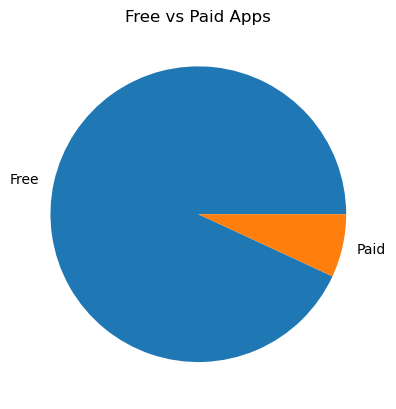

In [75]:
# Count the number of free and paid apps
free_apps = df[df['Type']==1].shape[0]
paid_apps = df[df['Type']==0].shape[0]

# Create a pie chart of free vs paid apps
plt.pie([free_apps, paid_apps], labels=['Free', 'Paid'])
plt.title('Free vs Paid Apps')
plt.show()

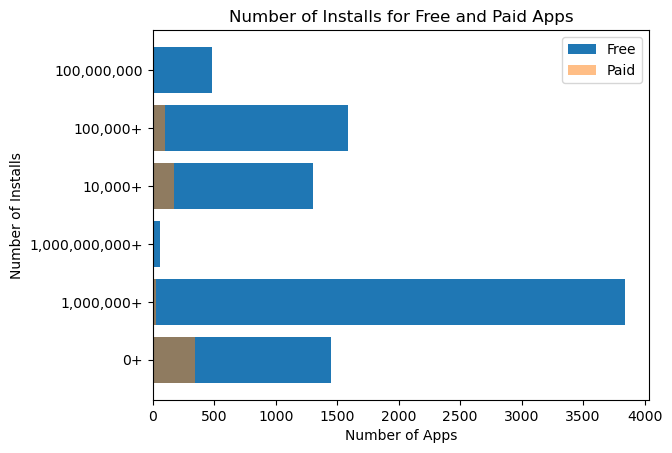

In [76]:
# Filter the data to include only free apps
free_apps = df[df['Type'] == 1]

# Count the number of apps with a certain number of installs
install_counts = free_apps['Installs'].value_counts().sort_index()

# Filter the data to include only paid apps
paid_apps = df[df['Type'] == 0]

# Count the number of apps with a certain number of installs
paid_install_counts = paid_apps['Installs'].value_counts().sort_index()

# Create a bar chart of the install counts
plt.barh(install_counts.index, install_counts.values)
plt.barh(paid_install_counts.index, paid_install_counts.values, alpha=0.5)
plt.xlabel('Number of Apps')
plt.ylabel('Number of Installs')
plt.title('Number of Installs for Free and Paid Apps')
plt.legend(['Free', 'Paid'])
plt.show()

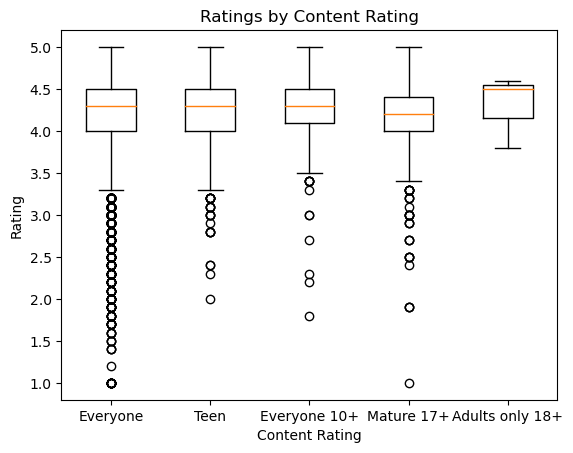

In [77]:
# Filter out apps with missing ratings or content rating
df = df.dropna(subset=['Rating', 'Content Rating'])

# Create a box plot of ratings by content rating
plt.boxplot([df[df['Content Rating']=='2.0']['Rating'],
             df[df['Content Rating']=='5.0']['Rating'],
             df[df['Content Rating']=='3.0']['Rating'],
             df[df['Content Rating']=='4.0']['Rating'],
             df[df['Content Rating']=='1.0']['Rating']],
            labels=['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+'])
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Ratings by Content Rating')
plt.show()

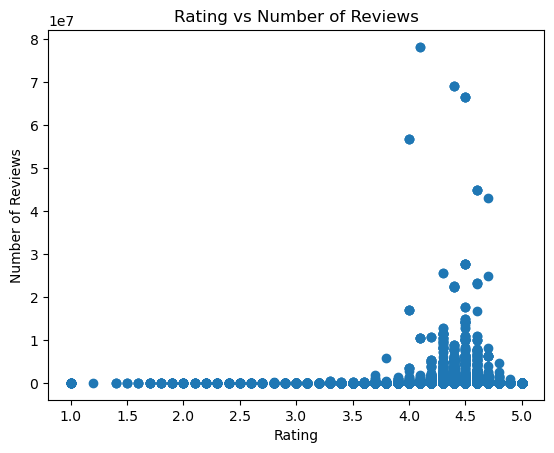

In [78]:
# Filter out apps with missing ratings or reviews
df = df.dropna(subset=['Rating', 'Reviews'])

# Create a scatter plot of rating vs reviews
plt.scatter(df['Rating'], df['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Rating vs Number of Reviews')
plt.show()

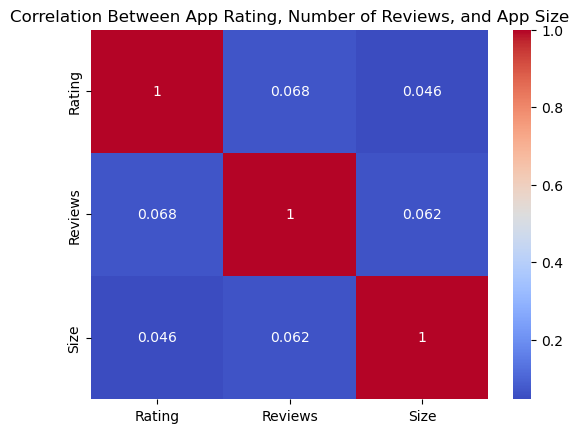

In [79]:
# Select the columns to include in the heatmap
cols = ['Rating', 'Reviews', 'Size']

# Calculate the correlation matrix
corr = df[cols].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between App Rating, Number of Reviews, and App Size')
plt.show()

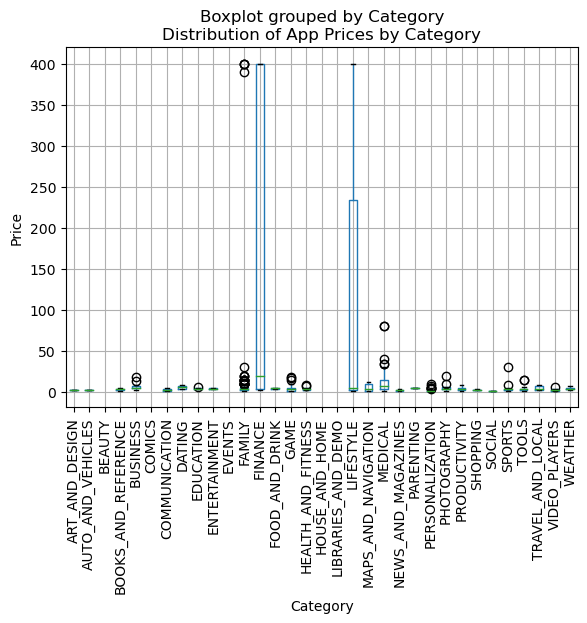

In [80]:
# Filter out the free apps
paid_apps = df[df['Type'] == 0]

# Create a box plot of app prices by category
boxplot = paid_apps.boxplot(column='Price', by='Category', rot=90)
boxplot.set_xticklabels(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS',
                         'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                         'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
                         'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
                         'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                         'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'])
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Distribution of App Prices by Category')
plt.show()

C:\Users\Aalimah\AppData\Local\Temp\ipykernel_28364\2556961681.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(category_counts.index, rotation=90)
C:\Users\Aalimah\AppData\Local\Temp\ipykernel_28364\2556961681.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS',


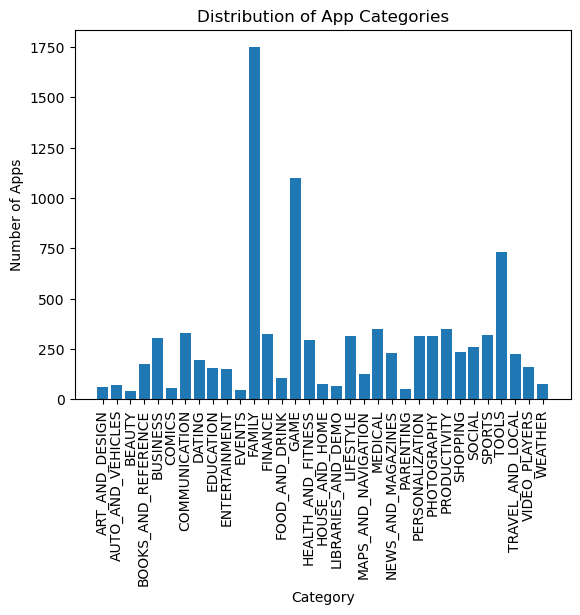

In [81]:
# Count the number of apps in each category
category_counts = df['Category'].value_counts()

# Sort the categories in ascending order
category_counts = category_counts.sort_index()

# Create a bar chart of the category counts
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Categories')

# Add x-axis labels
plt.gca().set_xticklabels(category_counts.index, rotation=90)
plt.gca().set_xticklabels(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS',
                         'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                         'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
                         'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
                         'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                         'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'])
plt.show()

# Models

### Gaussian Bayes

In [82]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
train_score = model.score(x_train, y_train)

print("Resuls: Gaussian Naive Bayes")
print("Train score: %s" % train_score)
print("Accuracy: %s" % accuracy)

Resuls: Gaussian Naive Bayes
Train score: 0.16319629827371418
Accuracy: 0.15852682145716573


### Random Forest 

In [83]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 4, criterion = 'entropy', random_state = 50)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Resuls: RandomForestClassifier")
print("Train score: %s" % train_score)
print("Accuracy: %s" % accuracy)

Resuls: RandomForestClassifier
Train score: 0.44794447410571275
Accuracy: 0.44782492660795303


### K-Nearest Neighbours

In [84]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
train_score = model.score(x_train, y_train)

print("Resuls: RandomForestClassifier")
print("Train score: %s" % train_score)
print("Accuracy: %s" % accuracy)

Resuls: RandomForestClassifier
Train score: 0.605979711692472
Accuracy: 0.4694422204430211


# Resampling

### Using RandomOverSampler

In [85]:
ros = RandomOverSampler(random_state = 42)
  
x_res, y_res = ros.fit_resample(x_data, y_data)
   
x_res = pd.DataFrame(x_res)
y_res = pd.DataFrame(y_res)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.4, random_state = 42)

### K-Nearest Neighbours

In [87]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
train_score = model.score(x_train, y_train)

print("Resuls: RandomForestClassifier")
print("Train score: %s" % train_score)
print("Accuracy: %s" % accuracy)

c:\Users\Aalimah\anaconda3\envs\aali_env\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Resuls: RandomForestClassifier
Train score: 0.6919322423198392
Accuracy: 0.595176571920758


### Random Forest 

In [88]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 4, criterion = 'entropy', random_state = 50)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Resuls: RandomForestClassifier")
print("Train score: %s" % train_score)
print("Accuracy: %s" % accuracy)

C:\Users\Aalimah\AppData\Local\Temp\ipykernel_28364\957043236.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Resuls: RandomForestClassifier
Train score: 0.46002009761699686
Accuracy: 0.4477820844099914


### Gaussian Bayes

In [89]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
train_score = model.score(x_train, y_train)

print("Resuls: Gaussian Naive Bayes")
print("Train score: %s" % train_score)
print("Accuracy: %s" % accuracy)

Resuls: Gaussian Naive Bayes
Train score: 0.32464829170255527
Accuracy: 0.3187984496124031


c:\Users\Aalimah\anaconda3\envs\aali_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Using SMOTE

In [90]:
sm = SMOTE(random_state = 42)
   
x_res, y_res = sm.fit_resample(x_data, y_data)
   
x_res = pd.DataFrame(x_res)
y_res = pd.DataFrame(y_res)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.4, random_state = 42)

### K-Nearest Neighbours

In [92]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
train_score = model.score(x_train, y_train)

print("Resuls: RandomForestClassifier")
print("Train score: %s" % train_score)
print("Accuracy: %s" % accuracy)

c:\Users\Aalimah\anaconda3\envs\aali_env\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Resuls: RandomForestClassifier
Train score: 0.6912862474877979
Accuracy: 0.5915159345391904


### Random Forest 

In [93]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 4, criterion = 'entropy', random_state = 50)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Resuls: RandomForestClassifier")
print("Train score: %s" % train_score)
print("Accuracy: %s" % accuracy)

C:\Users\Aalimah\AppData\Local\Temp\ipykernel_28364\957043236.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Resuls: RandomForestClassifier
Train score: 0.4525552684467413
Accuracy: 0.4372308354866494


### Gaussian Bayes

In [94]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
train_score = model.score(x_train, y_train)

print("Resuls: Gaussian Naive Bayes")
print("Train score: %s" % train_score)
print("Accuracy: %s" % accuracy)

Resuls: Gaussian Naive Bayes
Train score: 0.3331180017226529
Accuracy: 0.3292420327304048


c:\Users\Aalimah\anaconda3\envs\aali_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


| Model | Basic | RandomOverSampler | SMOTE |
| --- | --- | --- | --- |
| Gaussian | 15.9% | 31.9% | 32.9% |
| RandomForest | 44.8% | 44.6% | 43.7% |
| KNN | 47.2% | 59.2% | 58.5% |

RandomOverSampler gave higher accuracy scores that SMOTE for the Random Forest and K Nearest Neighbours models but SMOTE gave a higer accuracy score for the Gaussian Bayes model.
<br>RandomOverSampler is the oversampling method that will be used

# Sensitivity Analysis

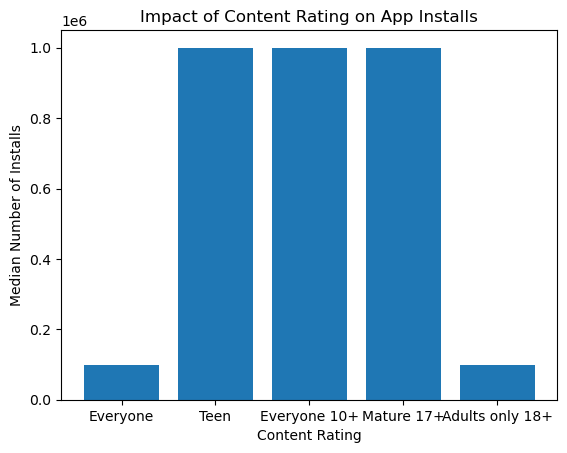

In [116]:
independent_variable = 'Installs'
content_rating_values = df['Content Rating'].unique()
dependent_variable_values = []
for rating_value in content_rating_values:
    median_installs = df[df['Content Rating'] == rating_value][independent_variable].median()
    dependent_variable_values.append(median_installs)

plt.bar(content_rating_values, dependent_variable_values)
plt.xlabel('Content Rating')
plt.ylabel('Median Number of Installs')
plt.title('Impact of Content Rating on App Installs')

# Specify custom content rating labels for the x-axis
custom_labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+']
plt.xticks(content_rating_values, custom_labels)

plt.show()

C:\Users\Aalimah\AppData\Local\Temp\ipykernel_28364\569993841.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(category_counts.index, rotation=90)
C:\Users\Aalimah\AppData\Local\Temp\ipykernel_28364\569993841.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS',


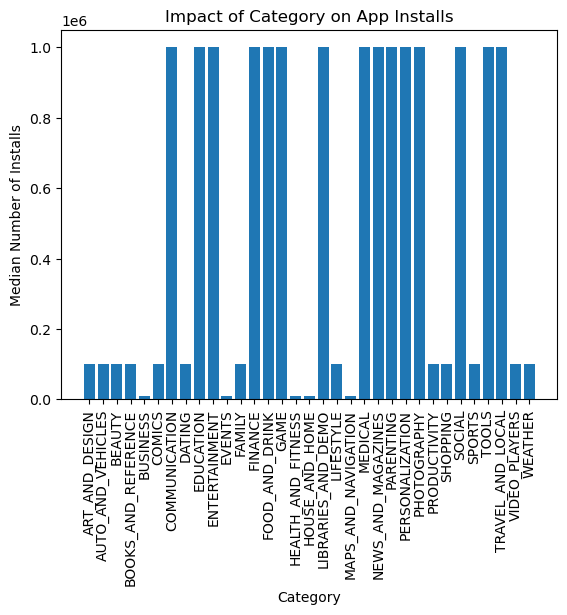

In [118]:
independent_variable = 'Category'
dependent_variable = 'Installs'
category_values = df[independent_variable].unique()
dependent_variable_values = []
for category_value in category_values:
    median_installs = df[df[independent_variable] == category_value][dependent_variable].median()
    dependent_variable_values.append(median_installs)

plt.bar(category_values, dependent_variable_values)
plt.xlabel('Category')
plt.ylabel('Median Number of Installs')
plt.title('Impact of Category on App Installs')

# Rotate x-axis labels for better readability
plt.gca().set_xticklabels(category_counts.index, rotation=90)
plt.gca().set_xticklabels(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS',
                         'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                         'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
                         'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
                         'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                         'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'])

plt.show()

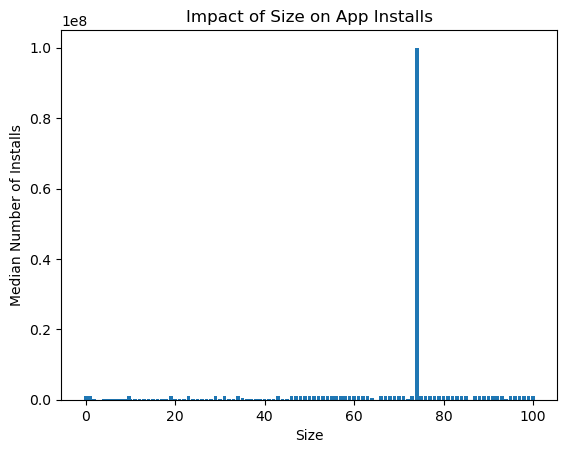

In [127]:
independent_variable = 'Size'
dependent_variable = 'Installs'
category_values = df[independent_variable].unique()
dependent_variable_values = []
for category_value in category_values:
    median_installs = df[df[independent_variable] == category_value][dependent_variable].median()
    dependent_variable_values.append(median_installs)

plt.bar(category_values, dependent_variable_values)
plt.xlabel('Size')
plt.ylabel('Median Number of Installs')
plt.title('Impact of Size on App Installs')

plt.show()

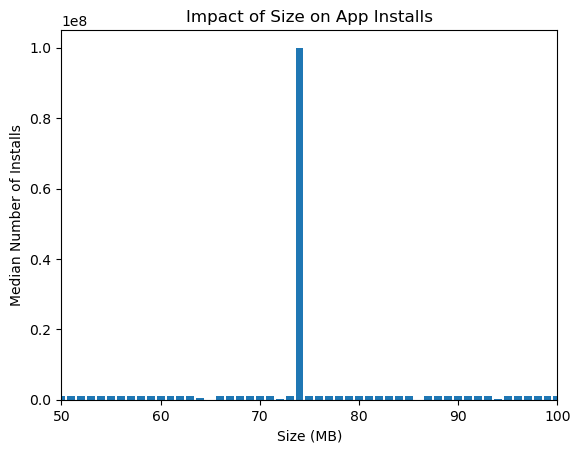

In [135]:
#Same thing as the one above, but a zoomed version
independent_variable = 'Size'
dependent_variable = 'Installs'
category_values = df[independent_variable].unique()
dependent_variable_values = []
for category_value in category_values:
    median_installs = df[df[independent_variable] == category_value][dependent_variable].median()
    dependent_variable_values.append(median_installs)

plt.bar(category_values, dependent_variable_values)
plt.xlabel('Size (MB)')
plt.ylabel('Median Number of Installs')
plt.title('Impact of Size on App Installs')

plt.xlim(50, 100) # Set the x-axis limits to zoom into the range of sizes between 50 and 100 MB

plt.show()

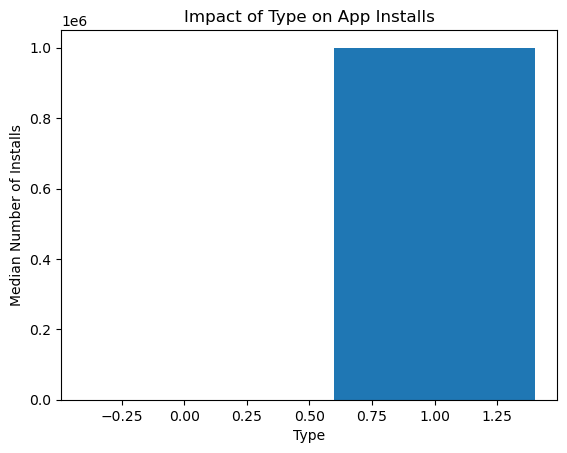

In [121]:
independent_variable = 'Type'
dependent_variable = 'Installs'
category_values = df[independent_variable].unique()
dependent_variable_values = []
for category_value in category_values:
    median_installs = df[df[independent_variable] == category_value][dependent_variable].median()
    dependent_variable_values.append(median_installs)

plt.bar(category_values, dependent_variable_values)
plt.xlabel('Type')
plt.ylabel('Median Number of Installs')
plt.title('Impact of Type on App Installs')

plt.show()

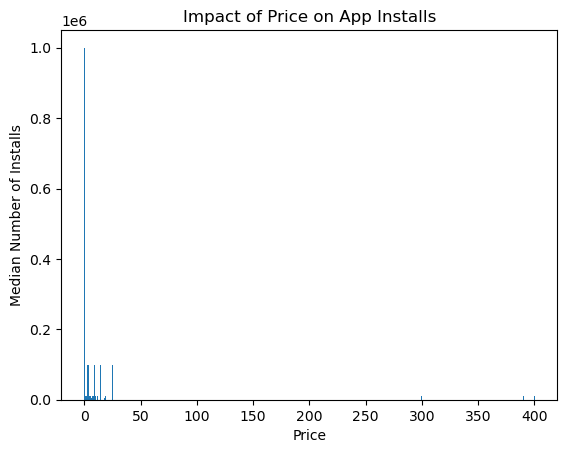

In [124]:
independent_variable = 'Price'
dependent_variable = 'Installs'
category_values = df[independent_variable].unique()
dependent_variable_values = []
for category_value in category_values:
    median_installs = df[df[independent_variable] == category_value][dependent_variable].median()
    dependent_variable_values.append(median_installs)

plt.bar(category_values, dependent_variable_values)
plt.xlabel('Price')
plt.ylabel('Median Number of Installs')
plt.title('Impact of Price on App Installs')

plt.show()

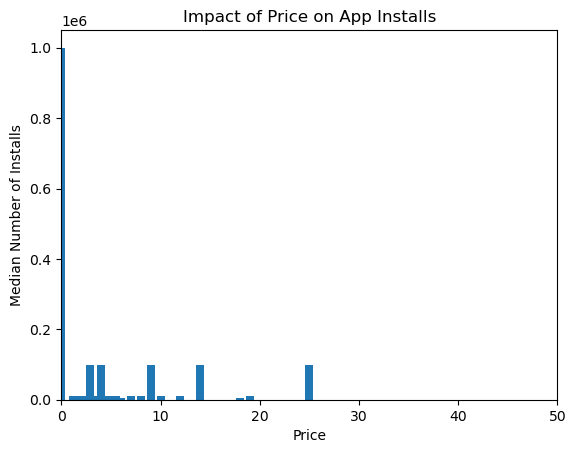

In [133]:
#Same thing as the one above, but a zoomed version
independent_variable = 'Price'
dependent_variable = 'Installs'
category_values = df[independent_variable].unique()
dependent_variable_values = []
for category_value in category_values:
    median_installs = df[df[independent_variable] == category_value][dependent_variable].median()
    dependent_variable_values.append(median_installs)

plt.bar(category_values, dependent_variable_values)
plt.xlabel('Price')
plt.ylabel('Median Number of Installs')
plt.title('Impact of Price on App Installs')

# Set the x-axis limits to zoom in to the more populated area
plt.xlim(0, 50)

plt.show()

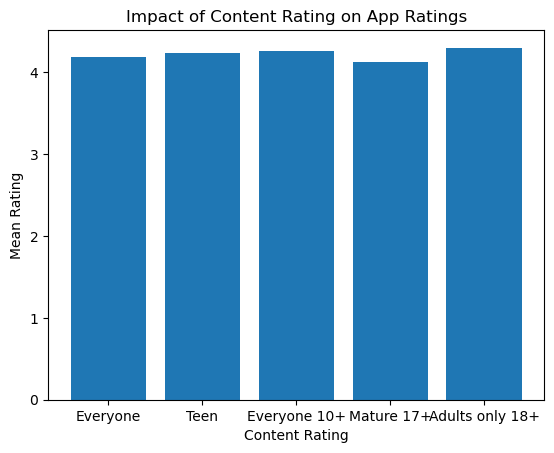

In [115]:
dependent_variable = 'Rating'
content_rating_values = df['Content Rating'].unique()
dependent_variable_values = []
for rating_value in content_rating_values:
    mean_rating = df[df['Content Rating'] == rating_value][dependent_variable].mean()
    dependent_variable_values.append(mean_rating)

plt.bar(content_rating_values, dependent_variable_values)
plt.xlabel('Content Rating')
plt.ylabel('Mean Rating')
plt.title('Impact of Content Rating on App Ratings')

# Specify custom content rating labels for the x-axis
custom_labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+']
plt.xticks(content_rating_values, custom_labels)

plt.show()

C:\Users\Aalimah\AppData\Local\Temp\ipykernel_28364\869441847.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(category_counts.index, rotation=90)
C:\Users\Aalimah\AppData\Local\Temp\ipykernel_28364\869441847.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS',


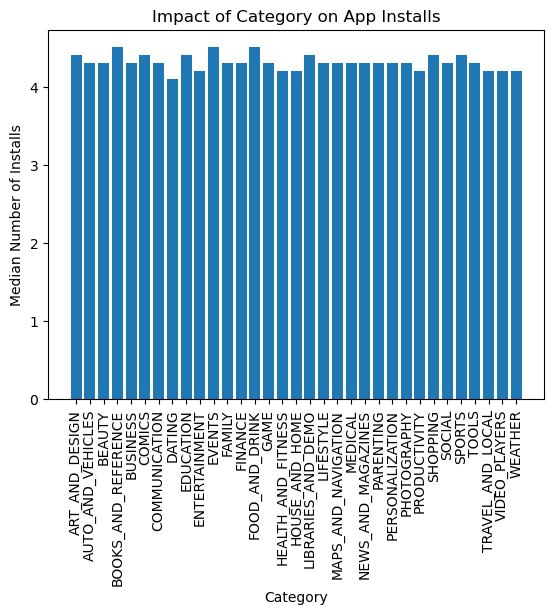

In [119]:
independent_variable = 'Category'
dependent_variable = 'Rating'
category_values = df[independent_variable].unique()
dependent_variable_values = []
for category_value in category_values:
    median_installs = df[df[independent_variable] == category_value][dependent_variable].median()
    dependent_variable_values.append(median_installs)

plt.bar(category_values, dependent_variable_values)
plt.xlabel('Category')
plt.ylabel('Median Number of Installs')
plt.title('Impact of Category on App Installs')

# Rotate x-axis labels for better readability
plt.gca().set_xticklabels(category_counts.index, rotation=90)
plt.gca().set_xticklabels(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS',
                         'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                         'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
                         'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
                         'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                         'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'])

plt.show()